<center><font size='8'>运筹学编程作业<font/>

<center><font size='5'>张锦程&thinsp; 材84&thinsp; 2018012082<font/>

<br/>

###### 编程语言：Python&emsp; version：3.7.7&emsp; date：2020/10/18&emsp; 

    
---
    


In [ ]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time
import copy

In [2]:
def function_z(x, y): # 待优化的函数
    return (1-x)**2 + 2*(y-x**2)**2
def function_zsqrt(x, y):
    return ((1-x)**2 + 2*(y-x**2)**2)**0.25

def function_dz(x, y): # function_z 的导数矩阵, 也可由scipy求导
    return np.array([-2+2*x+8*x**3-8*x*y, 4*y-4*x**2])
def function_d2z(x, y): # function_z 的 Hessian 导数矩阵, 也可由scipy求二阶导
    return np.array([[2+24*x**2-8*y, -8*x], [-8*x, 4]])
function_z(0, 0)

1

In [3]:
def newton_optimization(point0,ε,D): # point0为初始点，ε为搜索精度, D为搜索方向
    point=np.array(point0); D=np.array(D); t=1000
    while (t>ε) or (t<-ε) :
        f  = function_z(point[0],point[1])
        df = np.dot(function_dz(point[0],point[1]),D)
        d2f= np.dot(D, np.dot(function_d2z(point[0],point[1]),D.T))
        if df != 0:
            t = -df/d2f
            point = point + t*D
            print(t)
        else:
            return point
    return point

point=newton_optimization([0,0],float(1/10**10),[1,0])
point

1.0
-0.3076923076923077
-0.1510146295422369
-0.038902887734519144
-0.00238163966541995
-8.535256239218178e-06
-1.0927714285428288e-10


array([0.5, 0. ])

定义 $l_1$ 范数 $||D||_1=\sum\limits^n_{i=1}|d_i|$ 优化: 

\hat{d_i}=\begin{cases}
sgn(-\frac{\part f(X)}{\part x_i})\ &if\ |\frac{\part f(X)}{\part x_i}|=||\nabla f(X)||_{\infty} \\
0 &if\ |\frac{\part f(X)}{\part x_i}|\neq||\nabla f(X)||_{\infty} \\
\end{cases}

In [4]:
def l1_optimization(point0): # point0 为待寻找优化方向的点
    # 维数
    dimension = len(point0)
    D = np.zeros(dimension)
    dz = function_dz(point0[0], point0[1])
    i  = np.argmax(abs(dz)) # 选定的优化坐标序号
    D[i]=-np.sign(dz[i])
    return D
l1_optimization([0,0])

array([1., 0.])

定义 $l_2$ 范数 $||D||_1=\sqrt{\sum\limits^n_{i=1}|d_i|^2}$ 优化: 

$\hat{d_i}=sgn(-\frac{\part f(X)}{\part x_i})|\frac{\part f(X)}{\part x_i}|/(||\nabla f(X)||_q)$

In [5]:
def f_length(A): # 向量 A 的长度
    length2 = 0
    for i in range(len(A)):
        length2 += A[i]**2
    return length2**0.5

def l2_optimization(point0): # point0 为待寻找优化方向的点
    # 维数
    dimension = len(point0)
    D = np.zeros(dimension)
    dz= function_dz(point0[0], point0[1])
    D = -dz/f_length(dz)
    return D
l2_optimization([0,0])

array([1., 0.])

定义 $l_\infty$ 范数 $||D||_\infty=\max\limits_{1\leq i\leq n}|d_i|}$ 优化: 

$\hat{d_i}=sgn(-\frac{\part f(X)}{\part x_i}), \forall i$

In [6]:
def linf_optimization(point0): # point0 为待寻找优化方向的点
    # 维数
    dimension = len(point0)
    D = np.zeros(dimension)
    dz= function_dz(point0[0], point0[1])
    for i in range(len(dz)):
        D[i] = -np.sign(dz[i])
    return D
linf_optimization([0,0])

array([1., 0.])

下面实现 Fletcher-Reeves 和 Polak-Ribiere 两种共轭梯度法

In [7]:
# Fletcher-Reeves共轭梯度法, f_nabla为先前一步的梯度绝对值,Di为前一步的优化方向
def FR_optimization(point0,f_nabla,Di):
    dz= function_dz(point0[0], point0[1])
    α = f_length(dz)**2/f_nabla**2 # f_nabla为∞时，α为0
    D = -dz + α*Di
    print(α)
    return D

In [8]:
# Polak-Ribiere 共轭梯度法,vec_nabla为先前一步的梯度,Di为前一步的优化方向
def PR_optimization(point0,vec_nabla,Di):
    dz= function_dz(point0[0], point0[1])
    α = np.dot(dz,dz-vec_nabla)/f_length(vec_nabla)**2
    D = -dz + α*Di
    print(α)
    return D

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


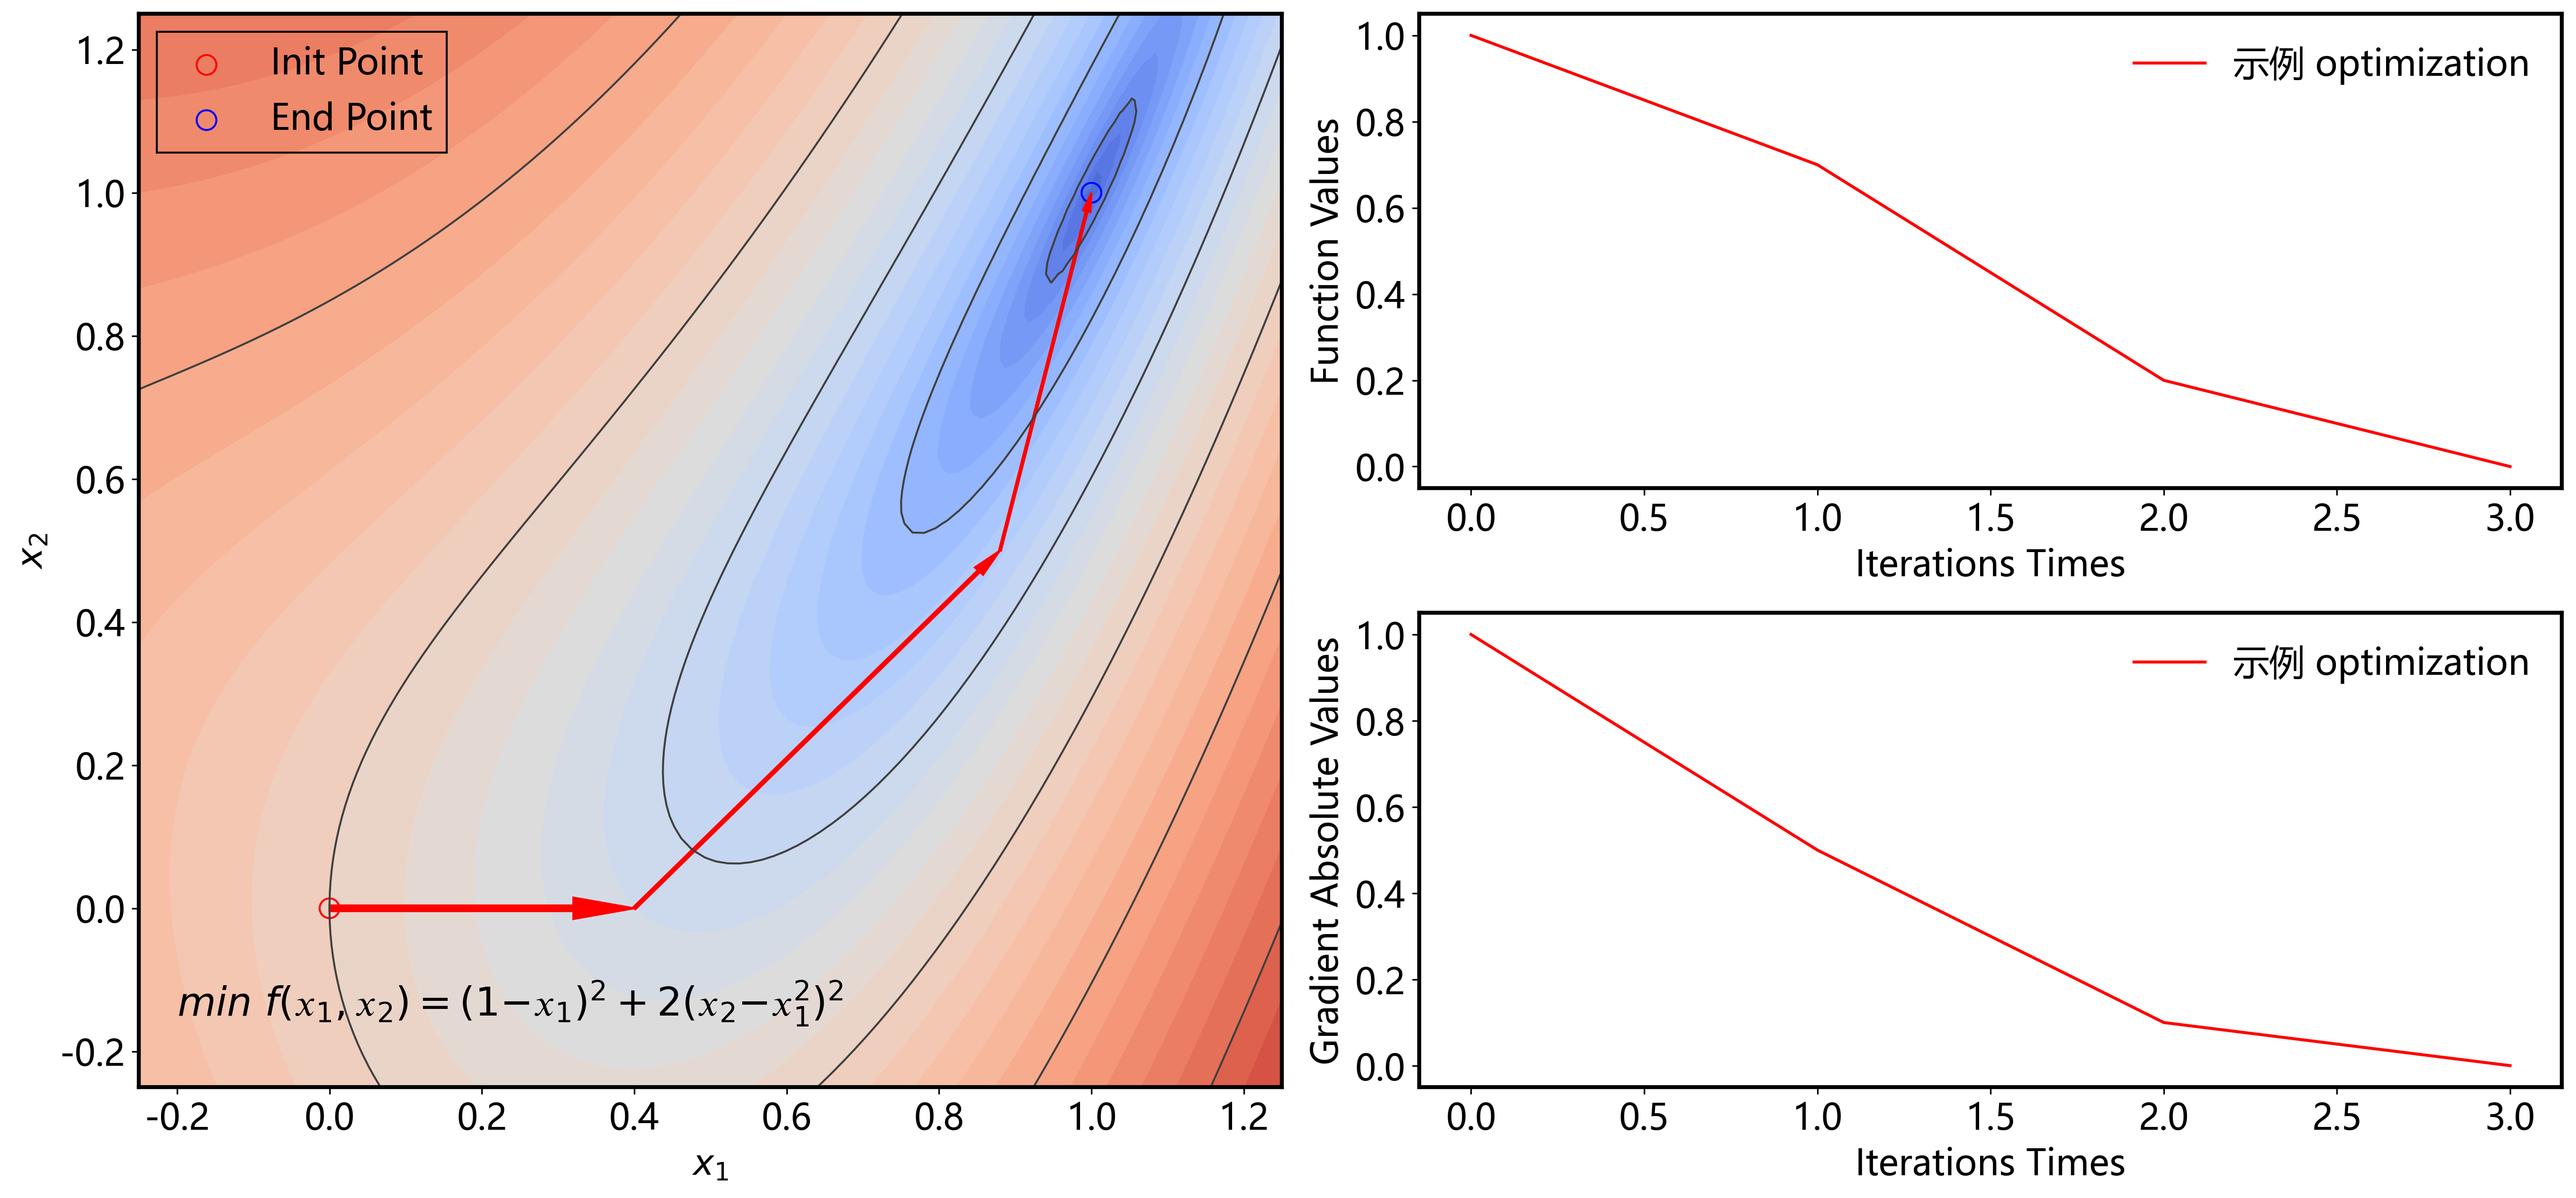

In [9]:
def plot(name,f_values,f_nablas,f_points):
    min_d = -0.25; max_d = 1.25; n_d = 100

    x = np.linspace(min_d, max_d, n_d).flatten()
    y = np.linspace(min_d, max_d, n_d).flatten()
    X, Y = np.meshgrid(x, y)
    z = function_zsqrt(X, Y)

    plt.rcParams["figure.figsize"] = [22, 10]
    plt.rcParams["figure.dpi"] = 300
    plt.rcParams['font.size'] = '18' # 设置字体大小 
    plt.rcParams['lines.color'] = 'k'

    fig = plt.figure()
    grid = plt.GridSpec(8, 8, wspace=0.75, hspace=5)

    ax1=plt.subplot(grid[0:8,0:4]); ax2=plt.subplot(grid[0:4,4:8]); ax3=plt.subplot(grid[4:8,4:8])

    levels = np.arange(0., function_zsqrt(max_d+0.25, 0), 0.05)
    cmap = cm.get_cmap(name='coolwarm', lut=None)
    ax1.contourf(X,Y,z, levels=levels, cmap=cmap)
    ax1.contour(X,Y,z, levels=levels,
                  colors=['0.25', '0.75', '0.75', '0.75', '0.75'],
                  linewidths=[1.0, 0., 0., 0., 0.])
    ax1.set_xlabel(r'$x_1$'); ax1.set_ylabel(r'$x_2$')
    ax1.scatter([f_points[0][0]],[f_points[0][1]],color='',marker='o',edgecolors='r',s=100,label='Init Point')
    ax1.scatter([f_points[-1][0]],[f_points[-1][1]],color='',marker='o',edgecolors='b',s=100,label='End Point')
    
    ax1.text(min_d+0.05, min_d+0.1, r"$min\ f(𝑥_1,𝑥_2) = (1−𝑥_1)^2 + 2(𝑥_2−𝑥_1^2)^2$", fontsize=20)   
    legend1 = ax1.legend(fancybox=False,edgecolor='k',loc=2); frame1=legend1.get_frame(); frame1.set_alpha(1); frame1.set_facecolor('none')
    ax1.spines['top'].set_linewidth('2.0');ax1.spines['left'].set_linewidth('2.0')
    ax1.spines['bottom'].set_linewidth('2.0');ax1.spines['right'].set_linewidth('2.0')
    
    # 画箭头
    for i in range(len(f_points)-1):
        ax1.arrow(f_points[i][0],f_points[i][1], f_points[i+1][0]-f_points[i][0], f_points[i+1][1]-f_points[i][1],
                    width=0.008/(i+1),length_includes_head=True,head_width=0.03/(i+1),head_length=0.08/(i+1),fc='r',ec='r')   
    
    ax2.plot(list(range(len(f_values))), f_values, 'r', label=name+" optimization")
    ax2.set_xlabel('Iterations Times'); ax2.set_ylabel('Function Values')
    ax2.legend(framealpha=0)
    ax2.spines['top'].set_linewidth('2.0');ax2.spines['left'].set_linewidth('2.0')
    ax2.spines['bottom'].set_linewidth('2.0');ax2.spines['right'].set_linewidth('2.0')
    
    
    ax3.plot(list(range(len(f_nablas))), f_nablas, 'r', label=name+" optimization")
    ax3.set_xlabel('Iterations Times'); ax3.set_ylabel('Gradient Absolute Values')
    ax3.legend(framealpha=0)
    ax3.spines['top'].set_linewidth('2.0');ax3.spines['left'].set_linewidth('2.0')
    ax3.spines['bottom'].set_linewidth('2.0');ax3.spines['right'].set_linewidth('2.0')
    
    plt.savefig(name+'迭代次数-函数值'+'.png')
    plt.show()
    
plot('示例',[1,0.7,0.2,0],[1,0.5,0.1,0],[[0,0],[0.4,0],[0.88,0.5],[1,1]])

下面开始优化过程，默认优化从 [0,0] 开始

In [10]:
init_point = [0,0]

def main(init_point,method_name,ε=10**(-10)):   # method_name为所使用的优化方法名称, init_point为优化初始点
    time_start=time.time() # 程序计时
    point = init_point
    f_values = [function_z(point[0],point[1])]  # 优化过程中所经历的函数值的集合
    f_nablas = [f_length(function_dz(point[0],point[1]))] # 优化过程中所经历的梯度绝对值的集合
    f_points = [point]  # 优化过程中所经历的点集
    t = float("inf"); f_nabla = float("inf"); Di = np.zeros(len(f_points)) # 步长和梯度和优化方向
    i = 1
    while f_nabla>ε:
        if method_name=='l1':
            D=l1_optimization(point0=point)
        if method_name=='l2':
            D=l2_optimization(point0=point)
        if method_name=='l∞':
            D=linf_optimization(point0=point)
        if method_name=='FR':
            D=FR_optimization(point0=point,f_nabla=f_nablas[-1],Di=Di)
        if method_name=='PR':
            D=PR_optimization(point0=point,vec_nabla=function_dz(f_points[-1][0],f_points[-1][1]),Di=Di)
        Di=copy.deepcopy(D)
        point = newton_optimization(point0=point,ε=ε,D=D)
        f_nabla = f_length(function_dz(point[0],point[1]))
        
        f_values.append(function_z(point[0],point[1]))
        f_nablas.append(f_nabla)
        f_points.append(point)
        t = f_length(f_points[-1]-f_points[-2])
        i = i+1
        if i>500:
            break
        
    time_end=time.time()
    print('最优解: '+str(f_points[-1])); print('最优值: '+str(f_values[-1]))
    print('优化用时: '+str(time_end-time_start)); print("\n\n\n")
    plot(method_name,f_values,f_nablas,f_points)     
    return point

point_l1 = main(init_point,'l1',ε=10**(-10))
point_l2 = main(init_point,'l2',ε=10**(-10))
point_linf=main(init_point,'l∞',ε=10**(-10))

In [ ]:
point_FR = main(init_point,'FR',ε=10**(-10))
point_PR = main(init_point,'PR',ε=10**(-10))